In [236]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import preprocessing
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean

In [38]:
pip install seaborn --upgrade

  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
Note: you may need to restart the kernel to use updated packages.


In [226]:
df = pd.read_csv('fedex.csv')
df.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,Shipment_Delay,Source,Destination,Distance,Delivery_Status
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,8.0,IAD,TPA,810,0.0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,19.0,IAD,TPA,810,1.0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,8.0,IND,BWI,515,0.0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,-4.0,IND,BWI,515,0.0
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,34.0,IND,BWI,515,1.0


In [56]:
#Summary Statistics
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3604175 entries, 0 to 3604174
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Month                  int64  
 2   DayofMonth             int64  
 3   DayOfWeek              int64  
 4   Actual_Shipment_Time   float64
 5   Planned_Shipment_Time  int64  
 6   Planned_Delivery_Time  int64  
 7   Carrier_Name           object 
 8   Carrier_Num            int64  
 9   Planned_TimeofTravel   float64
 10  Shipment_Delay         float64
 11  Source                 object 
 12  Destination            object 
 13  Distance               int64  
 14  Delivery_Status        float64
dtypes: float64(4), int64(8), object(3)
memory usage: 412.5+ MB


In [227]:
df.isna().sum().to_frame('Nulls')

,Nulls
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
Actual_Shipment_Time,81602
Planned_Shipment_Time,0
Planned_Delivery_Time,0
Carrier_Name,0
Carrier_Num,0
Planned_TimeofTravel,547


In [5]:
#Checking for Null Values
missing = df.isna().sum().to_frame('Nulls')
missing / len(df)

,Nulls
Year,0.000000
Month,0.000000
DayofMonth,0.000000
DayOfWeek,0.000000
Actual_Shipment_Time,0.022641
Planned_Shipment_Time,0.000000
Planned_Delivery_Time,0.000000
Carrier_Name,0.000000
Carrier_Num,0.000000
Planned_TimeofTravel,0.000152


In [ ]:
#Dropping Null values for insignificance as the number of missing values ia below 0.03% of the data.

In [228]:
df = df.dropna()
df.isna().sum().to_frame('Nulls')
#df.to_csv("df.csv")

,Nulls
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
Actual_Shipment_Time,0
Planned_Shipment_Time,0
Planned_Delivery_Time,0
Carrier_Name,0
Carrier_Num,0
Planned_TimeofTravel,0


In [8]:
df['Delivery_Status'],_ = pd.factorize(df['Delivery_Status'], sort=True)
pd.crosstab(df['Month'], df["Delivery_Status"], margins=True)

Delivery_Status,0,1,All
Month,,,
1,465228,123138,588366
2,418880,129680,548560
3,466344,133506,599850
4,488932,98779,587711
5,503886,96139,600025
6,460803,136852,597655
All,2804073,718094,3522167


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012380869B88>,
      dtype=object)

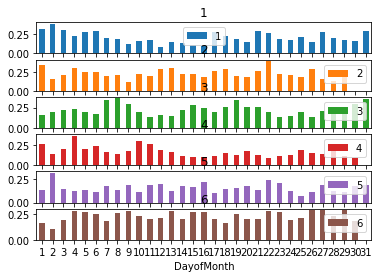

In [12]:
DayWise = df.pivot_table(index='DayofMonth', columns='Month', values="Delivery_Status")
DayWise.plot.bar(subplots=True, rot=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000012380F6C6C8>,
      dtype=object)

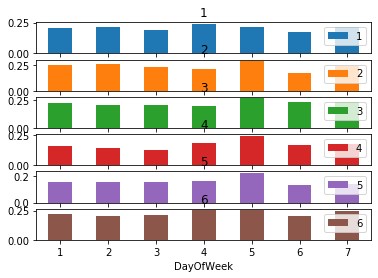

In [15]:
WeekWise = df.pivot_table(index='DayOfWeek', columns='Month', values="Delivery_Status")
WeekWise.plot.bar(subplots=True, rot=0)

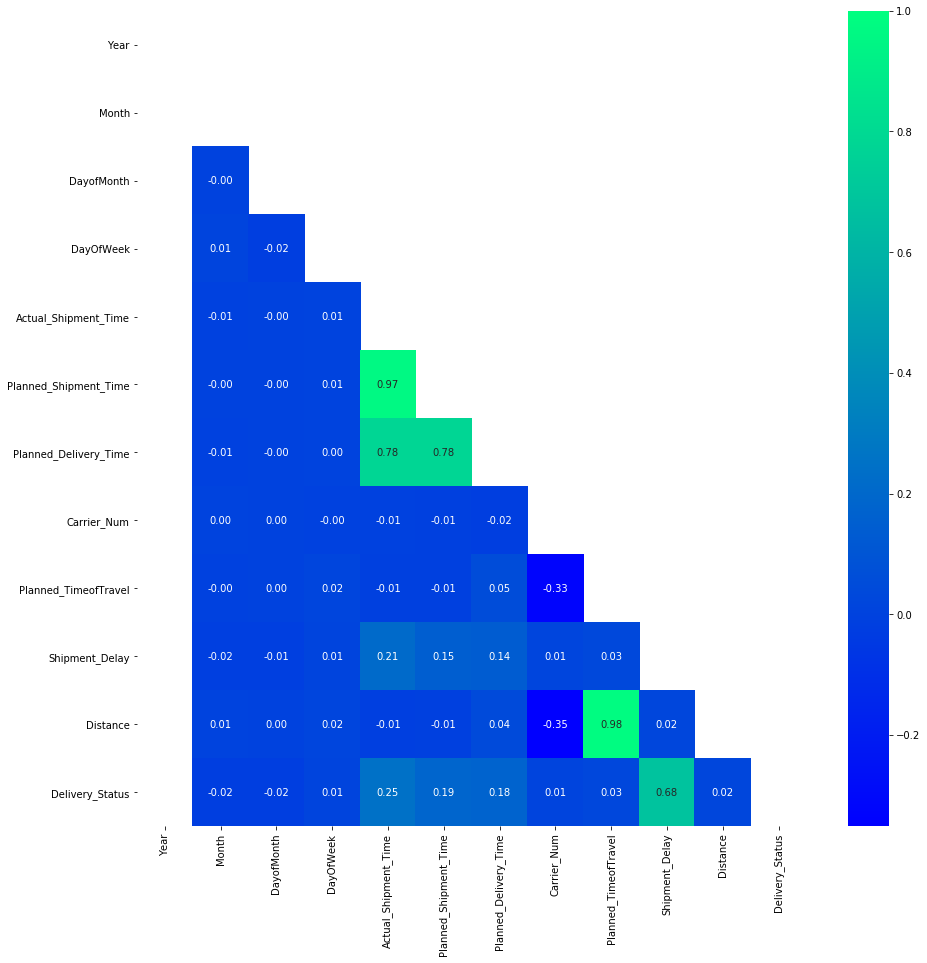

In [7]:
plt.figure(figsize=(15,15))
mask = np.triu(df.corr())
sns.heatmap(df.corr(), fmt='0.2f', cmap='winter', mask=mask, annot=True)
plt.show()

0.0    2804359
1.0     718214
Name: Delivery_Status, dtype: int64


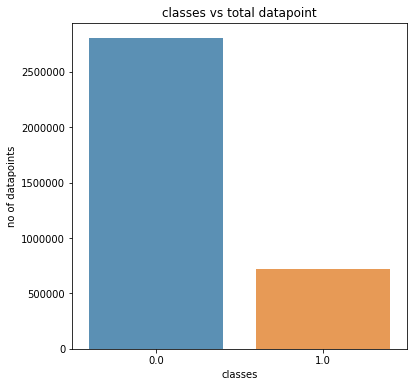

In [8]:
viz=df['Delivery_Status'].value_counts()
print(viz)
plt.figure(figsize=(6,6))
sns.barplot(viz.index, viz.values, alpha=0.8)
plt.title('classes vs total datapoint')
plt.ylabel('no of datapoints')
plt.xlabel('classes')
plt.show()

In [22]:
#df.to_csv("df.csv")

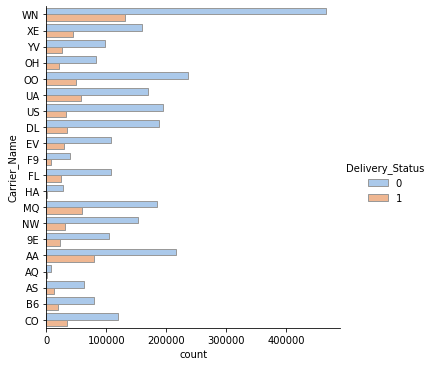

In [28]:
sns.catplot(y="Carrier_Name", hue="Delivery_Status", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

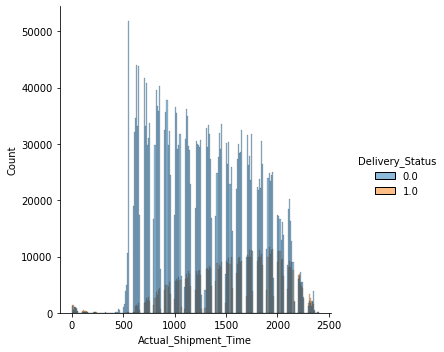

In [7]:
sns.displot(df, x="Actual_Shipment_Time", hue="Delivery_Status")

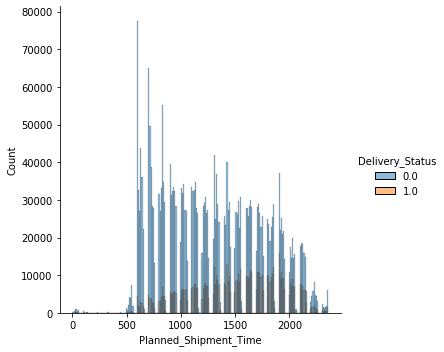

In [8]:
sns.displot(df, x="Planned_Shipment_Time", hue="Delivery_Status")

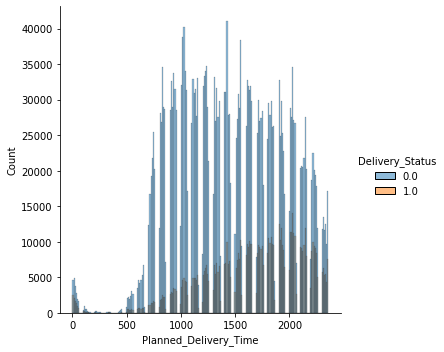

In [9]:
sns.displot(df, x="Planned_Delivery_Time", hue="Delivery_Status")

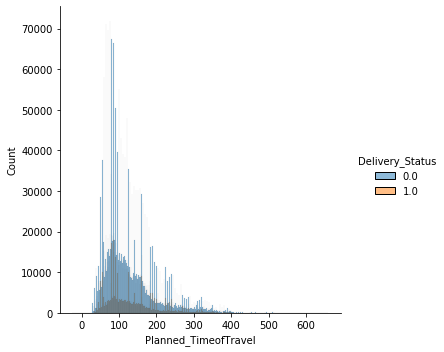

In [10]:
sns.displot(df, x="Planned_TimeofTravel", hue="Delivery_Status")

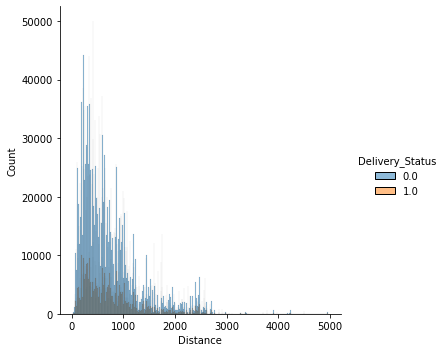

In [11]:
sns.displot(df, x="Distance", hue="Delivery_Status")

In [116]:
df['Carrier_Name'].value_counts()

WN    597366
AA    295685
OO    285274
MQ    243102
UA    227599
US    227576
DL    221916
XE    203345
NW    184428
CO    153934
EV    137940
FL    132384
9E    127034
YV    123703
OH    102903
B6     98879
AS     75377
F9     47734
HA     28230
AQ      7758
Name: Carrier_Name, dtype: int64

In [229]:
#Binning carrier names as the the total volumne of deliveries sent.
df['CarrierName'] = 'High'
df.loc[(df['Carrier_Name'].isin(['AA','OO','MQ','UA','US','DL'])),'CarrierName'] = 'Medium'
df.loc[(df['Carrier_Name'].isin(['XE','NW','CO','EV','FL','9E','YV','OH','B6','AS','F9','HA','AQ'])),'CarrierName'] = 'Low'

In [230]:
#Deriving new variable which will capture the packages sent based on shipment time and delivery time.
Type = [
    (df['Actual_Shipment_Time'] < df['Planned_Delivery_Time']),(df['Actual_Shipment_Time'] > df['Planned_Delivery_Time'])
    ]
df['Type'] = np.select(Type, ['1','2'])

In [231]:
#Deriving new variable which will capture weather actual shipment was greater than less than planned shipment time.
Acutal_planned = [
    (df['Actual_Shipment_Time'] < df['Planned_Shipment_Time']),(df['Actual_Shipment_Time'] > df['Planned_Shipment_Time'])
    ]
df['Acutal_planned'] = np.select(Type, ['1','2'])

In [232]:
df['hr'] = df['Planned_Shipment_Time'].map(str)
df['hr_len'] = df['Planned_Shipment_Time'].map(str).str.len()
df['Hour'] = df['hr'].str.slice(0, 2)
df.loc[(df['hr_len'].isin(['3'])),'Hour'] = df['hr'].str.slice(0, 1)
df.loc[(df['hr_len'].isin(['1','2'])),'Hour'] = '0'

In [233]:
#Creating dummy variables for model building
cat = ['Type','Acutal_planned','CarrierName', 'Hour']
df_dummy = pd.get_dummies(df,columns = cat)
df_dummy.head()

,Year,Month,DayofMonth,DayOfWeek,Actual_Shipment_Time,Planned_Shipment_Time,Planned_Delivery_Time,Carrier_Name,Carrier_Num,Planned_TimeofTravel,...,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9
0,2008,1,3,4,2003.0,1955,2225,WN,335,150.0,...,0,0,0,0,0,0,0,0,0,0
1,2008,1,3,4,754.0,735,1000,WN,3231,145.0,...,0,0,0,0,0,0,0,1,0,0
2,2008,1,3,4,628.0,620,750,WN,448,90.0,...,0,0,0,0,0,0,1,0,0,0
3,2008,1,3,4,926.0,930,1100,WN,1746,90.0,...,0,0,0,0,0,0,0,0,0,1
4,2008,1,3,4,1829.0,1755,1925,WN,3920,90.0,...,0,0,0,0,0,0,0,0,0,0


In [234]:
#Dropping variables:
cols = ['Year', 'Month','Actual_Shipment_Time','Planned_Shipment_Time','Planned_Delivery_Time',
                'Carrier_Name','Carrier_Num','Planned_TimeofTravel','Shipment_Delay','Source','Destination',
               'Type_0','Acutal_planned_0', 'hr', 'hr_len', 'Hour_0']
df_final = df_dummy.drop(cols, axis=1)
df_final.head()

,DayofMonth,DayOfWeek,Distance,Delivery_Status,Type_1,Type_2,Acutal_planned_1,Acutal_planned_2,CarrierName_High,CarrierName_Low,...,Hour_21,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9
0,3,4,810,0.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,4,810,1.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,3,4,515,0.0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,3,4,515,0.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,3,4,515,1.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [237]:
#Applying unsupervised techniques
#Using unsupervised learning for feature selection
cs = []
for i in range(1, 4):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_final)
    cs.append(kmeans.inertia_)

C:\Users\ysrivastava\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


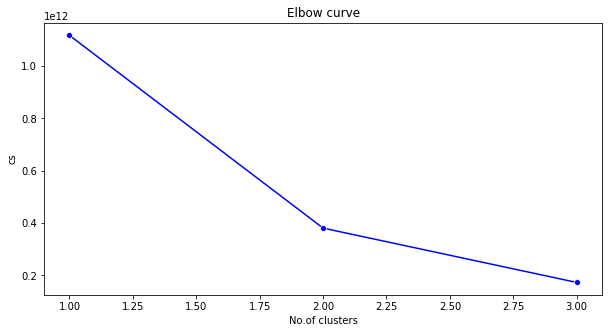

In [238]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 4), cs,marker='o',color='blue')
plt.title('Elbow curve')
plt.xlabel('No.of clusters')
plt.ylabel('cs')
plt.show()

In [239]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_final)

In [240]:
df_final['Cluster'] = y_kmeans
df_final.head()

,DayofMonth,DayOfWeek,Distance,Delivery_Status,Type_1,Type_2,Acutal_planned_1,Acutal_planned_2,CarrierName_High,CarrierName_Low,...,Hour_22,Hour_23,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Cluster
0,3,4,810,0.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,3,4,810,1.0,1,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,3,4,515,0.0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,3,4,515,0.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,3,4,515,1.0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [241]:
x = df_final.drop("Delivery_Status", axis="columns") # Features
y = df_final['Delivery_Status'] # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33) # 70% training and 30% test

Accuracy: 0.764939138754005
Recall: 0.3644799663476706
F1: 0.38810589755591735
AUC score is 0.616
              precision    recall  f1-score   support

         0.0       0.84      0.87      0.85    924591
         1.0       0.42      0.36      0.39    237725

    accuracy                           0.76   1162316
   macro avg       0.63      0.62      0.62   1162316
weighted avg       0.75      0.76      0.76   1162316



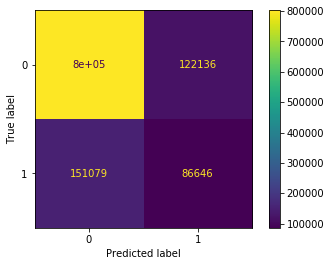

In [242]:
#Iteration1
#Running the classifier at default parameters - full grown tree
model = DecisionTreeClassifier()
#Fitting the model
model = model.fit(x_train,y_train)
#Predicting on test data
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, display_labels=[0,1])
print('AUC score is',round(roc_auc_score(y_test, y_pred),3))
print(classification_report(y_test, y_pred))

In [243]:
#Improving model performance using Regularization technique -  GridSearch method.
A = {"max_depth": range(15,25),"splitter":['best'],"criterion" : ['gini'],"min_samples_split":np.arange(1,10,5),"min_samples_leaf":np.arange(1,10,5)}
tree = DecisionTreeClassifier()
grid = GridSearchCV(tree,
                    param_grid = A,
                    cv=5,
                    verbose = 1,
                    n_jobs = -1)

In [244]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


C:\Users\ysrivastava\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:925: UserWarning: One or more of the test scores are non-finite: [       nan 0.82766709        nan 0.82811372        nan 0.82730774
        nan 0.82797134        nan 0.82668652        nan 0.82770649
        nan 0.82597842        nan 0.82746623        nan 0.82494022
        nan 0.82701196        nan 0.82349309        nan 0.82635683
        nan 0.82206673        nan 0.82581188        nan 0.82026916
        nan 0.82509913        nan 0.81822581        nan 0.82415839
        nan 0.815871          nan 0.82305408]
  category=UserWarning


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(15, 25),
                         'min_samples_leaf': array([1, 6]),
                         'min_samples_split': array([1, 6]),
                         'splitter': ['best']},
             verbose=1)

In [245]:
print(grid.best_params_); print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 6, 'splitter': 'best'}
0.8281137241046481


Accuracy: 0.8274815110520719
Recall: 0.16911978125985908
F1: 0.2862217855757148
AUC score is 0.583
              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90    924591
         1.0       0.93      0.17      0.29    237725

    accuracy                           0.83   1162316
   macro avg       0.88      0.58      0.59   1162316
weighted avg       0.85      0.83      0.78   1162316



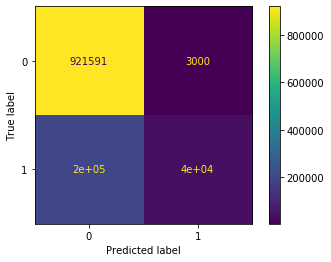

In [246]:
#Utilizing the above hyperparameters
#Iteration2
model = DecisionTreeClassifier(criterion ='gini', max_depth=15,min_samples_leaf=6, min_samples_split=6, splitter= 'best')
model = model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))
plot_confusion_matrix(model, x_test, y_test, display_labels=[0,1])
print('AUC score is',round(roc_auc_score(y_test, y_pred),3))
print(classification_report(y_test, y_pred))

718094
Int64Index([      0,       2,       3,       7,       8,       9,      10,
                 12,      13,      14,
            ...
            3604164, 3604165, 3604166, 3604167, 3604168, 3604169, 3604170,
            3604171, 3604172, 3604173],
           dtype='int64', length=2804073)
718094
Int64Index([      1,       4,       5,       6,      11,      16,      18,
                 19,      21,      22,
            ...
            3604116, 3604125, 3604126, 3604128, 3604130, 3604140, 3604145,
            3604160, 3604163, 3604174],
           dtype='int64', length=718094)


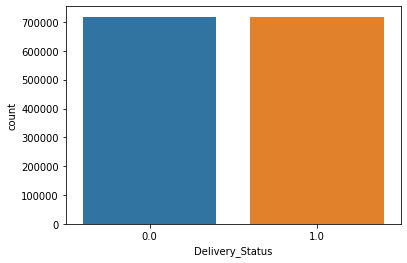

In [247]:
#Treating class imbalance

#Undersampling
#Undersampling using indices
minority = len(df_final[df_final['Delivery_Status']==1])
print(minority)
majority = df_final[df_final['Delivery_Status']==0].index
print(majority)
random_maj = np.random.choice(
    majority,
    minority,
    replace=False
)
print(len(random_maj))
minority_index = df_final[df_final['Delivery_Status']==1].index
print(minority_index)
under_sample_df = np.concatenate([minority_index, random_maj])
underSample = df_final.loc[under_sample_df]
sns.countplot(x=underSample['Delivery_Status'], data=underSample)

In [248]:
x1 = underSample.drop("Delivery_Status", axis="columns") # Features
y1 = underSample['Delivery_Status'] # Target variable
x_train4, x_test4, y_train4, y_test4 = train_test_split(x1, y1, test_size=0.33) # 70% training and 30% test

Accuracy: 0.6480652736721505
Recall: 0.6508210707708942
F1: 0.6488328957701288


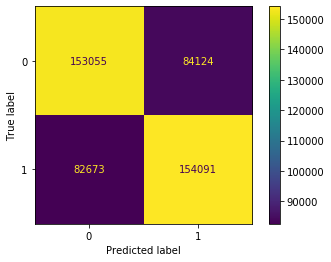

In [250]:
#Iteration3
model8 = DecisionTreeClassifier(criterion ='gini', max_depth=15,min_samples_leaf=6, min_samples_split=6, splitter= 'best')
model8 = model8.fit(x_train4,y_train4)
y_pred8 = model8.predict(x_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, y_pred8))
print("Recall:",metrics.recall_score(y_test4, y_pred8))
print("F1:",metrics.f1_score(y_test4, y_pred8))
plot_confusion_matrix(model8, x_test4, y_test4, display_labels=[0,1])

In [251]:
#Treating class imbalance

#Oversampling
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(random_state=0)
x_res2, y_res2 = os.fit_resample(x,y)
x_train3, x_test3, y_train3, y_test3 = train_test_split(x_res2, y_res2, test_size=0.33) # 70% training and 30% test

Accuracy: 0.6540985546464047
Recall: 0.6525677929551751
F1: 0.6535164918433842


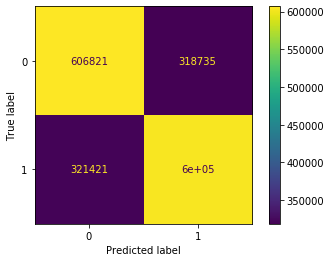

In [252]:
model7 = DecisionTreeClassifier(criterion ='gini', max_depth=15,min_samples_leaf=6, min_samples_split=6, splitter= 'best')
model7 = model7.fit(x_train3,y_train3)
y_pred7 = model7.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, y_pred7))
print("Recall:",metrics.recall_score(y_test3, y_pred7))
print("F1:",metrics.f1_score(y_test3, y_pred7))
plot_confusion_matrix(model7, x_test3, y_test3, display_labels=[0,1])